# Load Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import Clean Dataset

In [5]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
clean_df = pd.read_csv('clean_resume_data.csv')
#resume = pd.read_csv('Resume.csv')

In [6]:
clean_df = pd.read_csv('clean_resume_data.csv')


In [9]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [10]:
clean_df.shape

(2484, 3)

# Exploratory Data analysis

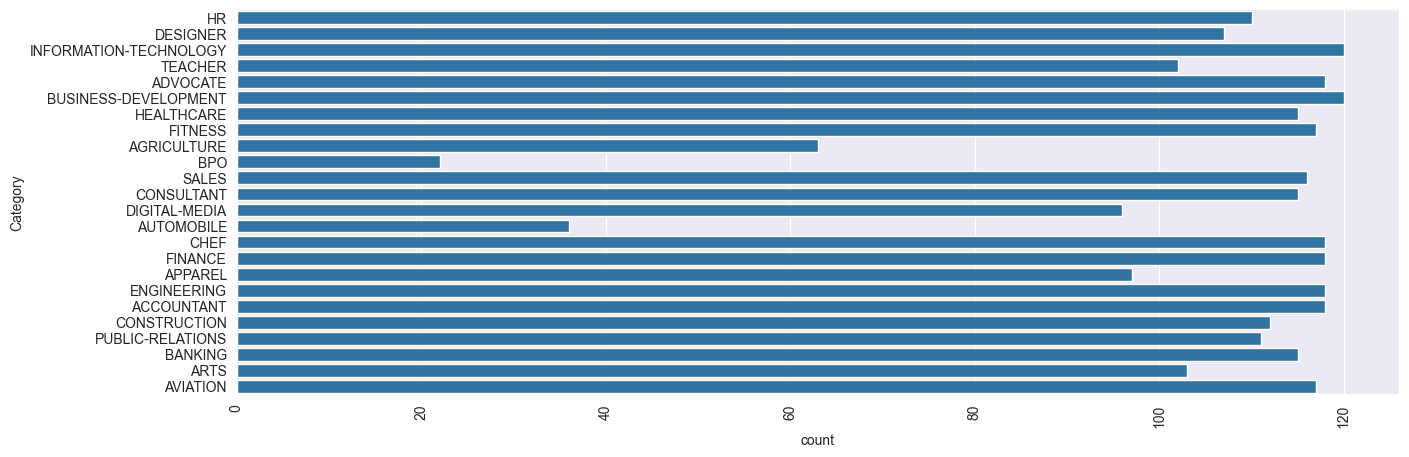

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)
plt.show()

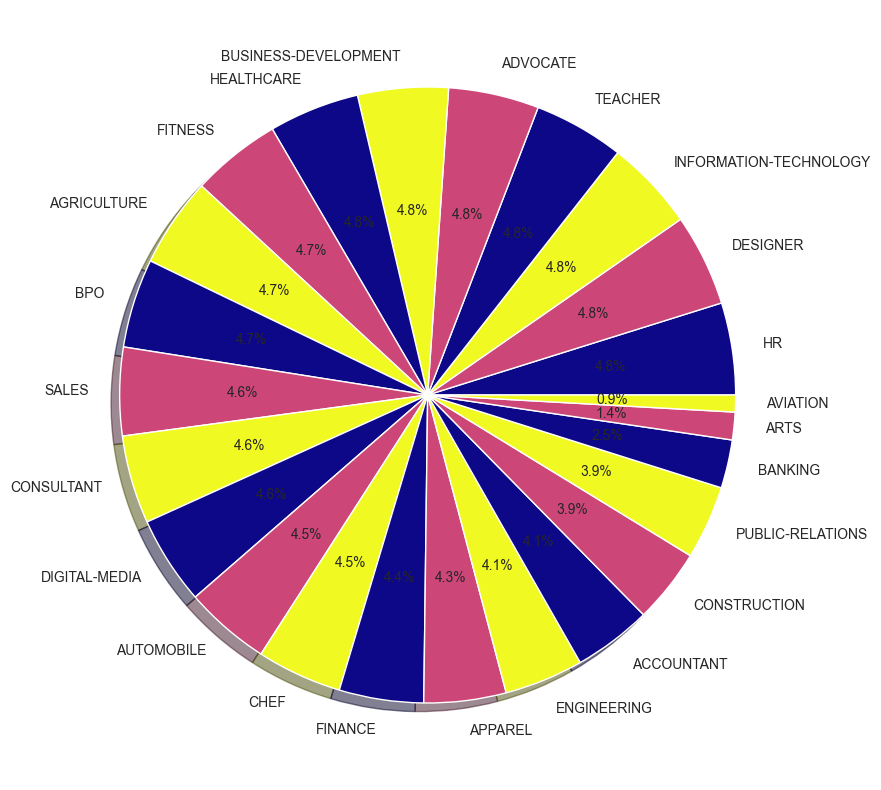

In [12]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Balance Dataset

In [13]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [14]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

# Train-Test Split


In [15]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding (TF-IDF)

In [16]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#  Train Random Forest Classifier

Accuracy: 0.8368055555555556
                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       1.00      0.72      0.84        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.94      0.81      0.87        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.93      0.93      0.93        30
               BANKING       1.00      0.74      0.85        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.41      0.50      0.45        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.95      0.61      0.75        31
              DESIGNER       0.93      0.93      0.93        28
         D

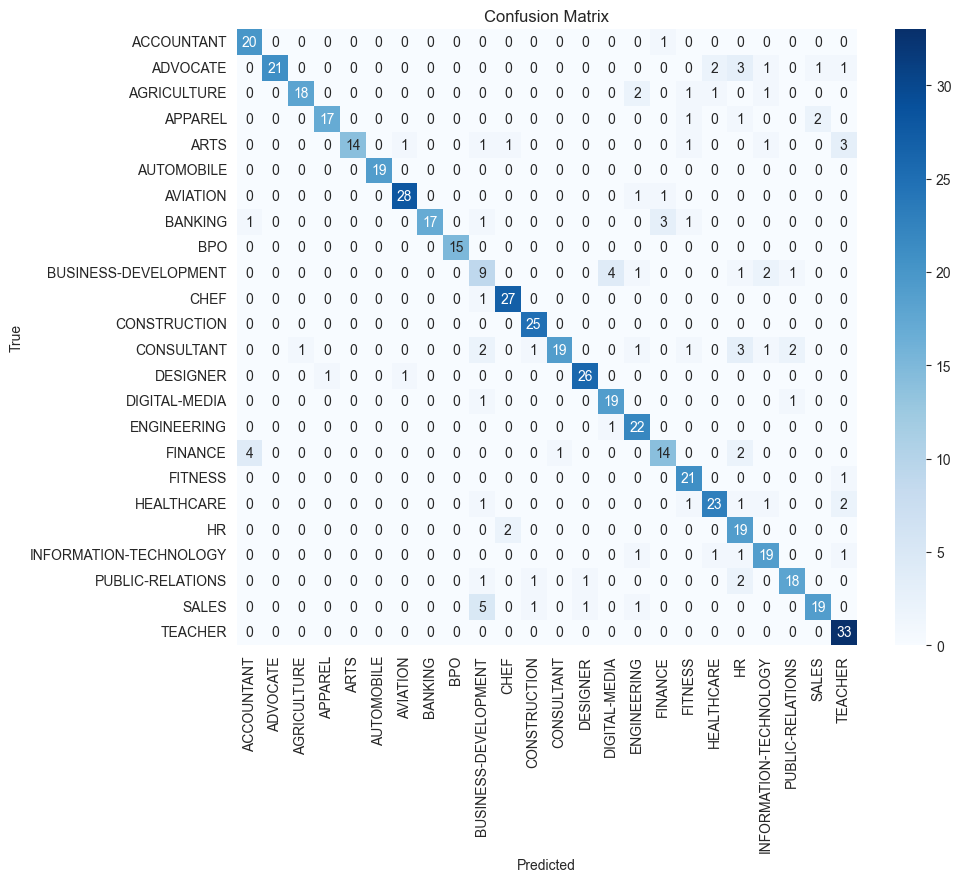

In [17]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predictive System

In [18]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yogass\AppData\Local\Temp\ipykernel_19896\1610880506.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\yogass\AppData\Local\Temp\ipykernel_19896\1610880506.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\yogass\AppData\Local\Temp\ipykernel_19896\1610880506.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\yogass\AppData\L

# Save Files

In [ ]:
import os
import pickle

# Define the folder name
folder_name = 'model'  # Replace with your desired folder name

try:
    # Check current working directory
    print("Current Working Directory:", os.getcwd())

    # Create the folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)
    print(f"Folder '{folder_name}' created successfully or already exists.")

    # # Save the RandomForestClassifier
    # with open(os.path.join(folder_name, 'rf_classifier_categorization.pkl'), 'wb') as model_file:
    #     pickle.dump(rf_classifier, model_file)

    # Save the TfidfVectorizer
    with open(os.path.join(folder_name, 'tfidf_vectorizer_categorization.pkl'), 'wb') as vectorizer_file:
        pickle.dump(tfidf_vectorizer, vectorizer_file)

    print(f"Files saved successfully in the '{folder_name}' folder.")

except Exception as e:
    print(f"An error occurred: {e}")


Files saved successfully in the 'model' folder.
